## Calculus Review
#### Differentiation
The key to calculus (in fact the fundamental theorem of calculus) states:

$$
\frac{d}{dx}\int_{a}^{x} f(t)dt = f(x)
$$

or if you prefer:

$$
\int_{a}^{b} f(x)dx = F(b) - F(a)
$$

This is important because it equates integral and differential calculus.

The definition of a derivative is:

$$
\frac{dy}{dx} = \lim_{h\to 0}\frac{f(x+h) - f(x)}{h}
$$

Understanding the definition of a derviative is important because computers are by nature discrete machines and thus cannot deal with continuous differentiation or integration. It instead uses approximation with h becoming incredibly small.

#### Chain Rule
Differentiation is important, but as functions get complicated, it becomes important to remember how to differentiate functions with multiple components. This is where chain rule comes into play. It is used extensively in machine learning (see backpropagation for an example). It can be defined as:

$$
\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}
$$

To put this into perspective, if a mathematical model has multiple internal parameters that need to be updated (i.e. different weights) then we need to update the error calculation with respect to the individual weight. This will result in different paths and requires using the chain rule. Let's take a look at a more concrete example:

#### Gradients
Gradients are used all over in system identification. The easiest way to think about it is the partial derivative of each variable in a with a multivariable function:

$$
\nabla f(p) = \begin{bmatrix}
               \frac{\partial f}{\partial x_1} (p) \\
               . \\
               . \\
               . \\
               \frac{\partial f}{\partial x_n} (p)
              \end{bmatrix}
$$

In hyperdimensional planes, this gradient is used to calculate the direction and fastest increase (or fastest decrease if the vector is negated). This is where gradient descent, hill climbing, etc. is derived.

#### Optimization
Back in Calculus I/II the term critical points was likely used a lot. These denoted maxima or minima of a function (local or global). These exist when the derivative of a function is 0. Because of the 0 slope, this means these points are either saddle points, maxima, or minima. All are important areas of study and points to watch out for in machine learning and system identification as they can create traps that our models can get stuck in.

In [14]:
"""
Code example pulled from Dr. Derek Anderson's lecture notes

Additions made to clarify points and add exercises for testing and experimenting done by Matthew Carroll
"""

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [15]:
"""
Defining function and partial derivatives
"""
def func_z(x, y):
    z = x**2/10. + x*y/50. + y**2.
    return z
def der_x(x, y):
    return 2 * x / 10. + y / 50.
def der_y(x, y):
    return x / 50. + 2 * y / 1.
def der_xx(x, y):
    return 2. / 10.
def der_yy(x, y):
    return 2. / 1.
def der_xy(x, y):
    return 1. / 50.
bounds = np.asarray([-3,3])

"""
Initial Values
"""
x0 = -2
y0 = -2
learning_rate = 0.15
epoch = 50

## Gradient Descent
Gradient Descent is a key tool in any machine learning toolbox. It is, in essence, how machines learn. Throughout the years there have been modifications and adjustments to make it more efficient and useful, but at the root, this optimization algorithm is how the model knows what to update.

Simply put in a mathematical term, its just:

$$
\theta_j := \theta_{j} - \alpha \nabla_{\theta_j} J(\theta)
$$

What this states is that the next iteration of parameters is the gradient scaled by a learning rate subtracted from the previous iteration parameters. This is a slight variation of the very common calculus practice of "hill climbing".

The following two videos explain gradient descent in different ways. The first, titled "How Machines Learn" by 3b1b, explains how gradient descent works in relation to neural networks. The second video, "Gradient Descent, Step-by-Step" by StatQuest, explains the intuition behind gradient descent from a linear regression process. Since gradient descent is an optimizer used throughout machine learning it will appear throughout shallow and deep learning.

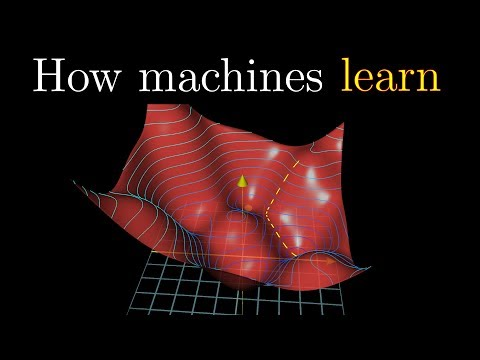

In [16]:
from IPython.display import YouTubeVideo

YouTubeVideo('IHZwWFHWa-w', width=800, height=300)

In [17]:
def gradient_descent(previous_x, previous_y, learning_rate, epoch):
    x_gd = []
    y_gd = []
    z_gd = []

    x_gd.append(previous_x)
    y_gd.append(previous_y)
    z_gd.append(func_z(previous_x, previous_y))

    for i in range(epoch):
        dx = der_x(previous_x, previous_y)
        dy = der_y(previous_x, previous_y)

        current_x = previous_x - (learning_rate * dx)
        x_gd.append(current_x)

        current_y = previous_y - (learning_rate * dy)
        y_gd.append(current_y)

        z_gd.append(func_z(current_x, current_y))

        previous_x = current_x
        previous_y = current_y

    return x_gd, y_gd, z_gd

## Gradient Descent Problems and Variants
As can be seen in the above plot, gradient descent does move towards a local minimum, however it takes a considerably large number of steps to get to the minimum.

### Momentum
Part of the issue with gradient descent is because when we take the gradient of the loss function we aren't taking the exact gradient. Instead we are using an estimate of the loss function defined by the batch of data. This means our gradients are always slightly off and we aren't going in the most optimal direction. *Momentum* attempts to correct this by maintaining an average of the previous gradients. It follows the equation:

$$
\theta_j := \beta \theta_{j} + \alpha \nabla_{\theta_j} J(\theta)
$$

The $\beta$ here corresponds to the momentum constant. It is a smoothing factor bounded to the range [0, 1]. The lower the $\beta$ the faster previous gradients are forgotten.

In [18]:
def momentum(previous_x, previous_y, learning_rate, epoch, mom):

    x_gd = []
    y_gd = []
    z_gd = []

    x_v = 0
    y_v = 0

    x_gd.append(previous_x)
    y_gd.append(previous_y)
    z_gd.append(func_z(previous_x, previous_y))

    for i in range(epoch):

        dx = der_x(previous_x,previous_y)
        dy = der_y(previous_x,previous_y)

        # note, our update changes a tad
        x_v = mom * x_v - learning_rate*dx # velocity
        current_x = previous_x + x_v # position
        x_gd.append(current_x)

        y_v = mom * y_v - learning_rate*dy # velocity
        current_y = previous_y + y_v # position
        y_gd.append(current_y)

        z_gd.append(func_z(current_x, current_y))

        previous_x = current_x
        previous_y = current_y

    return x_gd, y_gd, z_gd

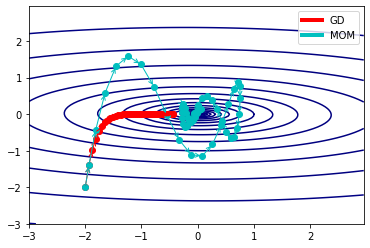

In [19]:
x_gd1, y_gd1, z_gd1 = gradient_descent(x0, y0, learning_rate, epoch)
x_gd2, y_gd2, z_gd2 = momentum(x0, y0, learning_rate, epoch, mom=0.9)

from matplotlib.lines import Line2D

a = np.arange(bounds[0], bounds[1], 0.05)
b = np.arange(bounds[0], bounds[1], 0.05)
x, y = np.meshgrid(a, b)
z = func_z(x, y)
fig1, ax1 = plt.subplots()
ax1.contour(x, y, z, levels=np.logspace(bounds[0], bounds[1], 25), cmap='jet')

# Plot our steps
ax1.plot(x_gd1, y_gd1, 'ro')
for i in range(1, epoch+1):
    ax1.annotate('', xy=(x_gd1[i], y_gd1[i]), xytext=(x_gd1[i-1], y_gd1[i-1]),
                 arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                 va='center', ha='center')

# Plot our steps
ax1.plot(x_gd2, y_gd2, 'co')
for i in range(1, epoch+1):
    ax1.annotate('', xy=(x_gd2[i], y_gd2[i]), xytext=(x_gd2[i-1], y_gd2[i-1]),
                 arrowprops={'arrowstyle': '->', 'color': 'c', 'lw': 1},
                 va='center', ha='center')

legend_elements = [Line2D([0], [0], color='r', lw=4, label='GD'),
                   Line2D([0], [0], color='c', lw=4, label='MOM'),]
ax1.legend(handles=legend_elements, loc='upper right')
plt.show()

### Adagrad
Much like momentum, *Adagrad (Adaptive Gradient)* attempts to address the speed of convergence. The key difference here is instead of maintaining a weighted average of previous gradients like momentum, adagrad attempts to make the learning rate, $\alpha$, vary via each iteration. Instead of a static learning rate, it scales $\alpha$ by dividing by the square root of the sum of squares of previous gradients. It follows the equation:

$$
\theta_j := \theta_j - \frac{\alpha}{\sqrt{G_i + \varepsilon}} \nabla_{\theta_j} J(\theta)\\
\text{where}\\
G_i := G_i + (\nabla_{\theta_j}J(\theta))^2
$$
Also note, $\varepsilon$ is just a small error correction to prevent division by zero.

In [20]:
def adagrad(previous_x, previous_y, learning_rate, epoch):

    eps = 1e-8

    x_gd = []
    y_gd = []
    z_gd = []

    x_gd.append(previous_x)
    y_gd.append(previous_y)
    z_gd.append(func_z(previous_x, previous_y))

    cache_x = cache_y = 0

    for i in range(epoch):

        dx = der_x(previous_x,previous_y)
        dy = der_y(previous_x,previous_y)

        cache_x = cache_x + dx**2
        cache_y = cache_y + dy**2
        current_x = previous_x - learning_rate * dx / (np.sqrt(cache_x) + eps)
        current_y = previous_y - learning_rate * dy / (np.sqrt(cache_y) + eps)

        x_gd.append(current_x)
        y_gd.append(current_y)

        z_gd.append(func_z(current_x, current_y))

        previous_x = current_x
        previous_y = current_y

    return x_gd, y_gd, z_gd

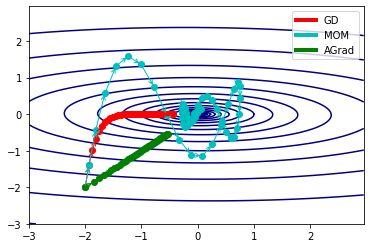

In [21]:
x_gd3, y_gd3, z_gd3 = adagrad(x0, y0, learning_rate, epoch)

from matplotlib.lines import Line2D

a = np.arange(bounds[0], bounds[1], 0.05)
b = np.arange(bounds[0], bounds[1], 0.05)
x, y = np.meshgrid(a, b)
z = func_z(x, y)
fig1, ax1 = plt.subplots()
ax1.contour(x, y, z, levels=np.logspace(bounds[0], bounds[1], 25), cmap='jet')



# Plot our steps
ax1.plot(x_gd1, y_gd1, 'ro')
for i in range(1, epoch+1):
    ax1.annotate('', xy=(x_gd1[i], y_gd1[i]), xytext=(x_gd1[i-1], y_gd1[i-1]),
                 arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                 va='center', ha='center')

# Plot our steps
ax1.plot(x_gd2, y_gd2, 'co')
for i in range(1, epoch+1):
    ax1.annotate('', xy=(x_gd2[i], y_gd2[i]), xytext=(x_gd2[i-1], y_gd2[i-1]),
                 arrowprops={'arrowstyle': '->', 'color': 'c', 'lw': 1},
                 va='center', ha='center')

# Plot our steps
ax1.plot(x_gd3, y_gd3, 'go')
for i in range(1, epoch+1):
    ax1.annotate('', xy=(x_gd3[i], y_gd3[i]), xytext=(x_gd3[i-1], y_gd3[i-1]),
                 arrowprops={'arrowstyle': '->', 'color': 'g', 'lw': 1},
                 va='center', ha='center')


legend_elements = [Line2D([0], [0], color='r', lw=4, label='GD'),
                   Line2D([0], [0], color='c', lw=4, label='MOM'),
                   Line2D([0], [0], color='g', lw=4, label='AGrad')]
ax1.legend(handles=legend_elements, loc='upper right')
plt.show()

#### RMSProp and Adam
RMSProp is essentially a slight variation from Adagrad. This algorithm however was never published in a formal academic paper and was instead introduced in a coursera course by Geoffery Hinton. The slight variation is how the $G_i$ is calculated. With RMSProp it adds a decay rate constant to operate over time similar to momentum.

[Adam](https://arxiv.org/pdf/1412.6980.pdf) is arguably the most popular modern day optimization technique. It succeeds because Adam utilizes a bias correction term. It incorporates all the previous techniques applied in RMSProp and Momentum as well to expand on the optimization techniques.

In [22]:
def rmsprop(previous_x, previous_y, learning_rate, epoch, decay_rate):

    eps = 1e-8

    x_gd = []
    y_gd = []
    z_gd = []

    cache_x = 0
    cache_y = 0

    x_gd.append(previous_x)
    y_gd.append(previous_y)
    z_gd.append(func_z(previous_x, previous_y))

    for i in range(epoch):

        dx = der_x(previous_x,previous_y)
        dy = der_y(previous_x,previous_y)

        if(i==0):
            cache_x = dx**2
        else:
            cache_x = decay_rate * cache_x + (1 - decay_rate)*dx**2
        current_x = previous_x - learning_rate*dx / (np.sqrt(cache_x) + eps)
        x_gd.append(current_x)

        if(i==0):
            cache_y = dy**2
        else:
            cache_y = decay_rate * cache_y + (1 - decay_rate)*dy**2
        current_y = previous_y - learning_rate*dy / (np.sqrt(cache_y) + eps)
        y_gd.append(current_y)

        z_gd.append(func_z(current_x, current_y))

        previous_x = current_x
        previous_y = current_y

    return x_gd, y_gd, z_gd

In [23]:
def adam(previous_x, previous_y, learning_rate, epoch, beta1, beta2):

    eps = 1e-8

    x_gd = []
    y_gd = []
    z_gd = []

    x_gd.append(previous_x)
    y_gd.append(previous_y)
    z_gd.append(func_z(previous_x, previous_y))

    mx = mxt = my = myt = vx = vxt = vy = vyt = 0

    for i in range(epoch):

        dx = der_x(previous_x,previous_y)
        dy = der_y(previous_x,previous_y)

        if(i==0):
            mx = mxt = dx
        else:
            mx = beta1*mx + (1-beta1)*dx
            mxt = mx / (1-beta1**(i+1))
        if(i==0):
            vx = vxt = dx**2
        else:
            vx = beta2*vx + (1-beta2)*(dx**2)
            vxt = vx / (1-beta2**(i+1))
        current_x = previous_x - learning_rate * mxt / (np.sqrt(vxt) + eps)
        x_gd.append(current_x)

        if(i==0):
            my = myt = dy
        else:
            my = beta1*my + (1-beta1)*dy
            myt = my / (1-beta1**(i+1))
        if(i==0):
            vy = vyt = dy**2
        else:
            vy = beta2*vy + (1-beta2)*(dy**2)
            vyt = vy / (1-beta2**(i+1))
        current_y = previous_y - learning_rate * myt / (np.sqrt(vyt) + eps)
        y_gd.append(current_y)

        z_gd.append(func_z(current_x, current_y))

        previous_x = current_x
        previous_y = current_y

    return x_gd, y_gd, z_gd

In [24]:
x_gd4, y_gd4, z_gd4 = rmsprop(x0, y0, learning_rate, epoch, decay_rate=0.99)
x_gd5, y_gd5, z_gd5 = adam(x0, y0, learning_rate, epoch, beta1=0.2, beta2=0.95)

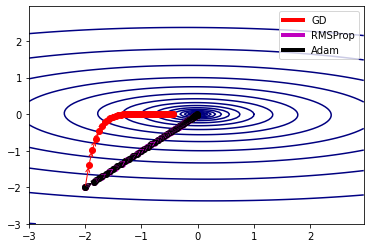

In [25]:
from matplotlib.lines import Line2D

a = np.arange(bounds[0], bounds[1], 0.05)
b = np.arange(bounds[0], bounds[1], 0.05)
x, y = np.meshgrid(a, b)
z = func_z(x, y)
fig1, ax1 = plt.subplots()
ax1.contour(x, y, z, levels=np.logspace(bounds[0], bounds[1], 25), cmap='jet')

# Plot our steps
ax1.plot(x_gd1, y_gd1, 'ro')
for i in range(1, epoch+1):
    ax1.annotate('', xy=(x_gd1[i], y_gd1[i]), xytext=(x_gd1[i-1], y_gd1[i-1]),
                 arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                 va='center', ha='center')

# Plot our steps
ax1.plot(x_gd4, y_gd4, 'mo')
for i in range(1, epoch+1):
    ax1.annotate('', xy=(x_gd4[i], y_gd4[i]), xytext=(x_gd4[i-1], y_gd4[i-1]),
                 arrowprops={'arrowstyle': '->', 'color': 'm', 'lw': 1},
                 va='center', ha='center')

# Plot our steps
ax1.plot(x_gd5, y_gd5, 'ko')
for i in range(1, epoch+1):
    ax1.annotate('', xy=(x_gd5[i], y_gd5[i]), xytext=(x_gd5[i-1], y_gd5[i-1]),
                 arrowprops={'arrowstyle': '->', 'color': 'k', 'lw': 1},
                 va='center', ha='center')

legend_elements = [Line2D([0], [0], color='r', lw=4, label='GD'),
                   Line2D([0], [0], color='m', lw=4, label='RMSProp'),
                   Line2D([0], [0], color='k', lw=4, label='Adam')]
ax1.legend(handles=legend_elements, loc='upper right')
plt.show()

## Hessian Optimization
Overall, each optimization problem is attempting to reach a hessian like optimization strategy. This is because hessian optimization only requires a single step to find the minimum. However, hessian matrices are not easy to calculate. This is what each optimization problem is attempting to achieve and the gold standard for optimization.

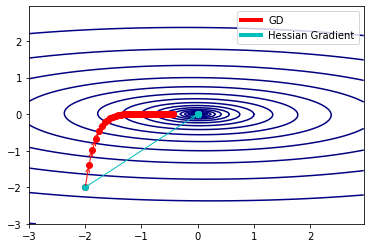

In [26]:
def gradient_hessian(previous_x, previous_y, epoch):

    x_gd = []
    y_gd = []
    z_gd = []

    x_v = 0
    y_v = 0

    x_gd.append(previous_x)
    y_gd.append(previous_y)
    z_gd.append(func_z(previous_x, previous_y))

    for i in range(epoch):

        dx = der_x(previous_x,previous_y)
        dy = der_y(previous_x,previous_y)
        g = np.asarray([dx, dy])

        # Hessian
        H = np.asarray([[der_xx(previous_x,previous_y), der_xy(previous_x,previous_y)],[der_xy(previous_x,previous_y), der_yy(previous_x,previous_y)]])

        # inverse
        Hinv = np.linalg.inv(H)

        # update equation
        Update = np.matmul( Hinv , g )

        # simple update in x and y
        current_x = previous_x - Update[0]
        x_gd.append(current_x)

        current_y = previous_y - Update[1]
        y_gd.append(current_y)

        z_gd.append(func_z(current_x, current_y))

        # update previous_x and previous_y
        previous_x = current_x
        previous_y = current_y

    return x_gd, y_gd, z_gd

x_gdH, y_gdH, z_gdH = gradient_hessian(x0, y0, 100)

a = np.arange(bounds[0], bounds[1], 0.05)
b = np.arange(bounds[0], bounds[1], 0.05)
x, y = np.meshgrid(a, b)
z = func_z(x, y)
fig1, ax1 = plt.subplots()
ax1.contour(x, y, z, levels=np.logspace(bounds[0], bounds[1], 25), cmap='jet')

# Plot our steps
ax1.plot(x_gd1, y_gd1, 'ro')
for i in range(1, epoch+1):
    ax1.annotate('', xy=(x_gd1[i], y_gd1[i]), xytext=(x_gd1[i-1], y_gd1[i-1]),
                 arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                 va='center', ha='center')

# Plot our steps
ax1.plot(x_gdH, y_gdH, 'co')
for i in range(1, epoch+1):
    ax1.annotate('', xy=(x_gdH[i], y_gdH[i]), xytext=(x_gdH[i-1], y_gdH[i-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'c', 'lw': 1},
                   va='center', ha='center')

legend_elements = [Line2D([0], [0], color='r', lw=4, label='GD'),
                   Line2D([0], [0], color='c', lw=4, label='Hessian Gradient')]

ax1.legend(handles=legend_elements, loc='upper right')
plt.show()

# Exercises
1. Explain some of the potential problems with gradient descent.
    1. Consider the advantages of various other optimizers and situations if the loss function is not smooth.
2. Vary the momentum parameter provided and try to find the smoothest descent. What value did you get?
    1. What happens if you increase/decrease the momentum?
3. Vary the learning rate in each optimization problem. What happens? Is there too large or too small a learning rate?
4. Why does the Hessian optimization strategy not require a learning rate?
5. How might you reduce the noise in the gradient calculation for gradient descent?
6. Another popular term used in machine learning is called Stochastic Gradient Descent. Given that the definition for stochastic is "randomly determined" what does this mean in the context of gradient descent?